# Homework Assignment #4 (Individual)
## Regression models

### <p style="text-align: right;"> &#9989; Febri Daneswary</p>
### <p style="text-align: right;"> &#9989; fdswry</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Performing multiple regression using `statsmodels` and/or `sklearn`
* Understand the metric of a good fit
* Test/Train datasets

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, November 11.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


------
<a id="toc"></a>

## Table of contents

1. [Part 1: Git](#part1) (7 points)

2. [Part 2: Multiple Regression](#part3) (42 points)

3. [Part 3: Logistic Regression](#part4) (25 points)

4. [Part 4: Finishing](#conclusion) (3 points)

In [1]:
grades = [7, 42, 25, 3]

print(f"The total grade for this assignment is {sum(grades)}" )

The total grade for this assignment is 77


---
<a id="part1"></a>
[Back to ToC](#toc)

## Part 1: Git (7 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `hw-04` and copy this notebook in that new directory.

``` bash
cd cmse202-F22-turnin
mkdir hw-04
```


&#9989; **Question 1.2 (2 points)**: Before you move on, create a new branch called `hw04_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
git branch hw04_branch
git checkout hw04_branch
git status


```

&#9989; **Question 1.3 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
git add 'HW-04_Regression-Febri Daneswary.ipynb'
git commit -m "initial commit"
```

What is the commit message you used ?

``` bash
"initial commit"

```

&#9989; **Question 1.4 (1 point):** Finally push the updated notebook to GitHub.

``` bash
git push
git push --set-upstream origin hw04_branch
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04-branch`.

In [2]:
# Run this cell before moving on
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns

sns.set_context("talk")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


---
<a id="part2"></a>
[Back to ToC](#toc)

## Part 2: Mulitple Regression (42 points)

In this part of the homework, you will work with data from the California Housing Prices dataset. Our goal is to use ordinary least squares to design a linear model to fit the median house value in a California census district given eight features. We will try both a linear model using all the provided features, as well as a reduced linear model which only uses a subset of the features. 

&#9989;  **Question 2.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv`

``` bash
curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv

```

&#9989;  **Question 2.2 (2 points)**: **Do This:** To get started, read in the `housing.csv` dataset into a Pandas DataFrame, and then display some of its rows.

In [3]:
df = pd.read_csv("housing.csv", delimiter=',')
df.head()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY


&#9989;  **Question 2.3 (2 points)**: You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.** Note that we will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment.

In [4]:
housing = df.dropna()
housing = housing.drop(['ocean_proximity'], axis=1)
housing

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,5.045455,1.133333,845,330,1.5603,78100
20636,-121.21,39.49,18,6.114035,1.315789,356,114,2.5568,77100
20637,-121.22,39.43,17,5.205543,1.120092,1007,433,1.7000,92300
20638,-121.32,39.43,18,5.329513,1.171920,741,349,1.8672,84700


&#9989;  **Question 2.4 (6 points)**: **Do This:** Using the `OLS()` method in `statsmodels.api`, make an ordinary least squares model that predicts "median_house_value" using the other features and display the `.summary()` of that process. **Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.**

In [68]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = housing[['longitude','latitude','housing_median_age','avg_rooms','avg_bedrooms','population','households','median_income']]
y = housing['median_house_value']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
predictions = results.summary()
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4514.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:36:35   Log-Likelihood:            -2.5677e+05
No. Observations:               20433   AIC:                         5.136e+05
Df Residuals:                   20424   BIC:                         5.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.558e+06   6.35e+04    -56.021      0.000   -3.68e+06   -3.43e+06
longitude          -4.223e+04    725.615    -58.205      0.000   -4.37e+04   -4.08e+04
latitude           -4.213e+04    692.323    -60.854      0.000   -4.35e+04   -4.08e+04
housing_median_age  1139.3771     43.181     26.386      0.000    1054.739    1224.015
avg_rooms          -6625.2745    573.271    -11.557      0.000   -7748.932   -5501.617
avg_bedrooms        4.571e+04   2737.024     16.699      0.000    4.03e+04    5.11e+04
population           -41.2977      1.036    -39.865      0.000     -43.328     -39.267
households           134.5370      3.087     43.583      0.000     128.486     140.588
median_income       4.156e+04    406.403    102.256      0.000    4.08e+04    4.24e+04
==============================================================================
Omnibus:                     4964.002   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20949.365
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.404   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 2.5 (6 points)**: **Answer These Questions:** 
1. Based on the output of the OLS summary, does this linear model appear to be a good fit? 
2. Which of these features appear to be "significant" in predicting the "median_house_value"?

<font size=+3>&#9998;</font> Put your answers here: 
1. Based on the output of the OLS summary, this linear model appears to be a good fit because our R-squared value is 0.639, which is super close to a value of 1. 
2. I think to determine "significance" all depends on our p-values, and in this case, our p-values from all features seem to be significant. However, to determine the most "significant" in predicting the "median_house_value" we would depend on our coefficient. "housing_median_age" and "households" are probably the most significant in predicting "median_house_values".


&#9989;  **Question 2.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/pnvcKQ2/Perfect-Model.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Answer These Questions:** 
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

<font size=+3>&#9998;</font> Put your answers here:
1. I researched about getting a perfect R squared value, and the way they got it is because the coefficients are probably optimized to maximize the degree of model fit for their variables and all linear values of the variables.
2. I don't think their model is better than mine because judging by their p-values, all of their values don't indicate that the features are significant to our "median_house_value" feature. They all give an indication that all our other features are weak or they don't a give a strong indication that they are significant.

&#9989;  **Question 2.7 (2 points)**: **Answer This:** Use `plot_regress_exog` to examine the fits to the data, using `latitude` as the independent variable. Notice that the predicted data points don’t follow a linear trend (I.e., a straight line). Describe the trend you see. 

<Figure size 1080x576 with 0 Axes>

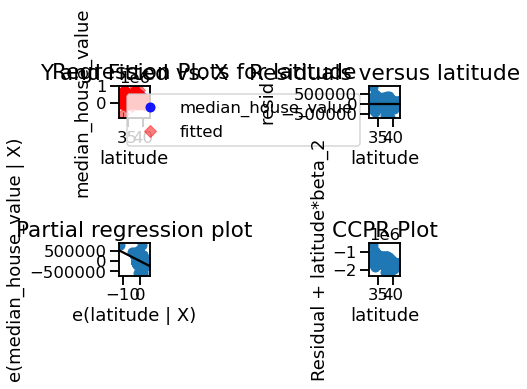

In [65]:
# Put your code here

fit = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 'latitude')
plt.show()

<font size=+3>&#9998;</font> Put your answers here:


&#9989;  **Question 2.8 (1 points)**: **Answer This:** Explain why the best fit values don’t follow a straight line. Is this a linear model (I.e., with depdence on `latitude`, but no dependence on `latitude`^2, `latitude`^3, etc.)? Be as detailed as possible. 

<font size=+3>&#9998;</font> Put your answers here:
I think the main reason why the best fit values don't follow a straight line, as presented and dependent on "latitude" is because the standard error values are too large to be considered actually significant. Most times, the significance or to tell if two variables are best fit, we look at the standard errors, or in other words, the distance between the plotted points and the line of best fit. If the standard error is too big, we can say that the plotted points are way too far from the best fit linear line; meaning that this linear line that passed through the points aren't giving the best results, direction, or correlation of the points. In the case if we wanted to depend on latitude^2 or latitude^3, this means we are adding features into our equation, which will possibly result in a polynomial regression line or some sort. If we did this, our best fit values won't follow a straight line. We would possibly get a best fit line that actually would pass through most of the plotted points, and in return our standard error values won't be as large compared to our "latitude" linear regression. Hence, polynomial regression would be a better fit value than a straight line. 

&#9989;  **Question 2.9 (6 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems." 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

**Do This:** Design a second linear model that uses a subset of the eight features to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 3.4. You can choose this subset either by trial and error, or by any other method you'd like.

<Figure size 1080x576 with 0 Axes>

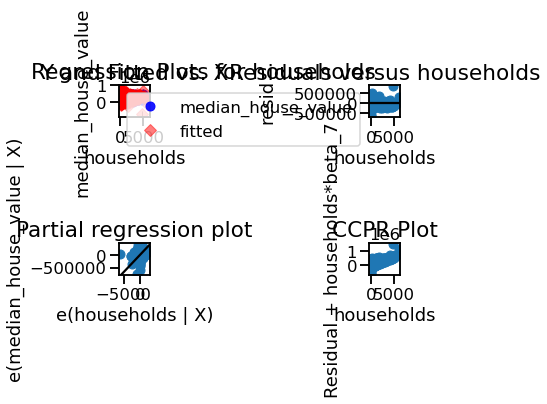

In [80]:
# Put your code here

fit = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 'households')
plt.show()

&#9989;  **Question 2.10 (4 points)**: **Answer This:** How did your reduced linear model fit the data compared to the full linear model you created in Question 3.4? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> Put your answers here:
I think the reduced linear model generally fits better as a best fit line rather than the full linear model. 

&#9989;  **Question 2.11 (2 points)**: **Answer This:** Now that you have your reduced model, make a heat map showing the correlations between the different variables (similar to what we did on Day 14).

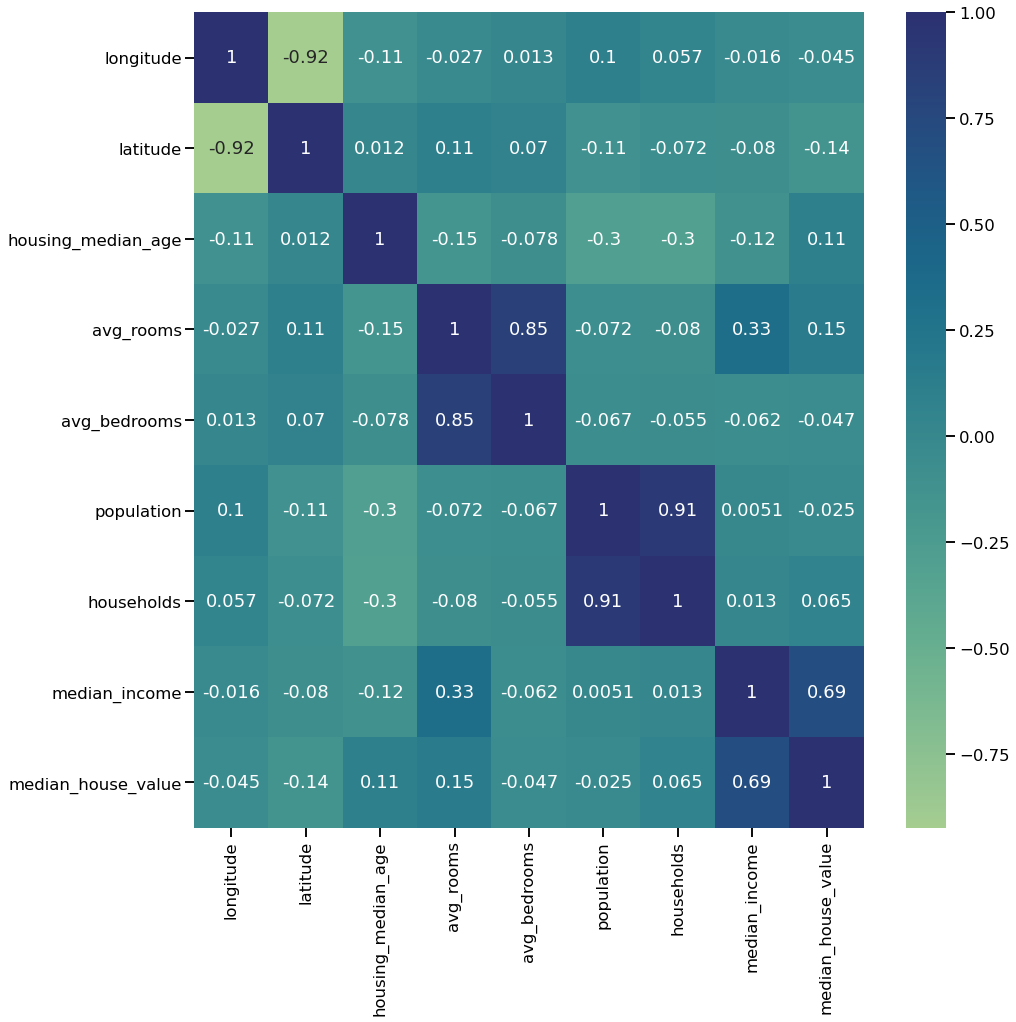

In [75]:
# Put your code here

corr_matrix = housing.corr()
corr_matrix

fig, ax = plt.subplots(1,1, figsize = (15,15) )
heat_map = sns.heatmap(corr_matrix, cmap='crest', annot=True)

&#9989;  **Question 2.12 (4 points)**: **Answer This:** You should find that there isn’t much overlap between the high-correlation variables in the heat map and the variables you used in your (reduced)  model, the opposite of what we found on Day 14. Explain why this is the case.

<font size=+3>&#9998;</font> Put your answers here:

There isn't much overlap between the high-correlation variables in the heat map and the variables we used in the model because a correlation matrix actually calculates the same coefficients and significants against another variable. The correlation matrix 1.0 represents values presented against themselves and absolute correlation. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete" 

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3. Logistic Regression (25 points)

In this part of the homework, you will work with data from an unknown source. Our goal is to use logistic regression to identify who is more likely to buy merchandise from ads on social networks.

&#9989;  **Question 3.1 (4 points)**: 

1. **Do This:** Download the dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv`
    
2. **Do This:** Load the data in this file into a `Pandas` dataframe
3. **Do This:** Display the first **five** rows of the dataframe. 

In [12]:
# Put the command to download the data here 

!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10926  100 10926    0     0  92593      0 --:--:-- --:--:-- --:--:-- 91815


In [15]:
# Put your code for reading in the dataset here

df = pd.read_csv('ads.csv', delimiter=',')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As you can see the dataset has only few columns. The first columns is not useful since it is a unique identifier. The second column could be useful, however, we need numbers instead of strings. Hence we are left only with the last three columns. `Age` and `EstimatedSalary` will be our features while `Purchased` will be our labels 

&#9989;  **Question 3.2 (3 points)**: 

1. **Do This:** Drop the first and second columns of the dataset    
2. **Do This:** Divided the rest of the dataset into a train and a test dataset using `train_test_split` function of `scikit-learn`. The test dataset should be 25% of the original data


In [88]:
# Put your code here

df.drop(columns=['User ID','Gender'])

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


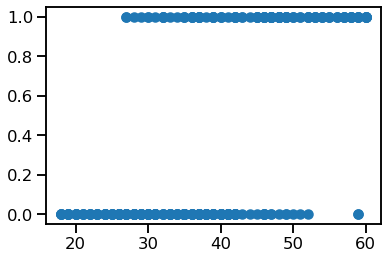

In [154]:
from sklearn.model_selection import train_test_split

features = ['Age','EstimatedSalary','Purchased']

x_train, x_test, y_train, y_text = train_test_split(df['Age'], df['EstimatedSalary'], random_state=0, train_size=.25)
plt.scatter(df['Age'], df['Purchased'])
plt.show()

In [155]:
y_train.head()

201     74000
339    122000
98      73000
387     71000
178     23000
Name: EstimatedSalary, dtype: int64

In [156]:
x_test.head()

132    30
309    38
341    35
196    30
246    35
Name: Age, dtype: int64

&#9989;  **Question 3.3 (4 points)**: 

1. **Do This:** Use the `Logit` class to perform Logistic regression on your training dataset (don't forget to add the constant).
2. **Do This:** Print the results of your model


In [172]:
# Put your code here

def normalize(x):
    return x - x.mean()

# Method to make predictions
def predict(x, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for i in x])

# Method to train the model
def logistic_regression(x,y):

    X = normalize(x)


    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [180]:
b0, b1 = logistic_regression(x_train, y_train)

# Making predictions
X_test_norm = normalize(x_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred, c="red")
plt.show()

NameError: name 'Y' is not defined

&#9989;  **Question 3.4 (2 points)**: Do you think this is a good fit? Explain your answer


     I think it looks like a good fit because there are more data points plotted on the red and there are only a few blue plotted data points left. 

&#9989;  **Question 3.5 (4 points)**: Use the above model to make predictions on the test dataset. Remember that the `Logit` model returns continuous values from 0 to 1 while you need two discrete values. Then use the function `accuracy_score` from `scikit-learn` to see how good your model is.

In [183]:
# Put your code here

from sklearn.metrics import accuracy_score


X_test_norm = normalize(x_test)
y_pred = predict(X_test_norm, b0, b1)
accuracy_score(y_train, y_pred)


NameError: name 'b0' is not defined

&#9989;  **Question 3.6 (1 point)**: Does the accuracy score change your opinion of the goodness of your model?


    write your answer here

&#9989;  **Question 3.7 (5 points)**: Does your model improve if you re-introduce the `Gender` column? Since the column is made of strings, replace `Male` with 0 and `Female` with 1. Is `Gender` an informative feature?
Explain your answers

In [ ]:
# Put your code here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete" 

---

## Part 4. Finishing up (3 points)


It is now time to merge your changes to the main branch and push

&#9989; **Question 4.1 (1 point):** Switch to your main branch

```bash
git checkout main
```

&#9989; **Question 4.2 (1 point):** Merge your `hw04-branch`

```bash
git merge hw04-branch
```

&#9989; **Question 4.3 (1 point):** Finally push the changes to GitHub

```bash
git push
```

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [91]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/TMrrP0WnVM" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University